In [2]:
import numpy as np
import pandas as pd

!pip install kneed

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from kneed import KneeLocator, DataGenerator as dg

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [3]:
df = pd.read_csv("hw2_dataset.csv")

In [4]:
df

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,ZSRJHGJCRGZJNH-UHFFFAOYSA-N,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
965,ZTCGLAMYEAGAAN-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,1,1
966,ZVWRFVCNQOECJS-UHFFFAOYSA-N,1,0,1,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
967,ZXAGZULZCKUUKQ-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,1,1


In [5]:
df.head

<bound method NDFrame.head of                               ID  D_0  D_1  D_2  D_3  D_4  D_5  D_6  D_7  D_8  \
0    AAEAMMIUQZAASJ-MRXNPFEDSA-N    1    1    1    1    1    1    1    0    1   
1    AAEFNWQXBPYXAC-UHFFFAOYSA-N    1    1    1    1    0    1    1    1    0   
2    AAMHSIWFDKXUMZ-UHFFFAOYSA-N    1    1    1    1    1    1    0    1    1   
3    AAPQXEOSVSLLMB-UHFFFAOYSA-N    1    1    1    1    0    1    1    1    1   
4    AARXXEHXOBTROW-UHFFFAOYSA-N    1    1    1    1    1    1    1    0    1   
..                           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
964  ZSRJHGJCRGZJNH-UHFFFAOYSA-N    1    1    1    1    1    1    1    1    1   
965  ZTCGLAMYEAGAAN-UHFFFAOYSA-N    1    1    1    1    1    1    1    0    0   
966  ZVWRFVCNQOECJS-UHFFFAOYSA-N    1    0    1    1    1    1    0    1    0   
967  ZXAGZULZCKUUKQ-UHFFFAOYSA-N    1    1    1    1    1    1    1    0    0   
968  ZXUIBIOEWLNNLY-UHFFFAOYSA-N    1    1    1    1    0    1    0    0    0  

In [6]:
df.dtypes

ID        object
D_0        int64
D_1        int64
D_2        int64
D_3        int64
           ...  
D_1019     int64
D_1020     int64
D_1021     int64
D_1022     int64
D_1023     int64
Length: 1025, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


### K-Means Clustering Elbow Method

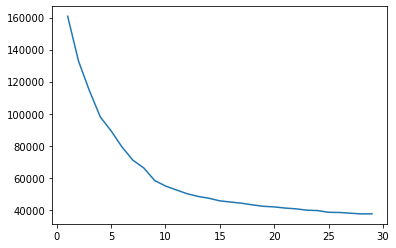

In [8]:
dist = []
df2 = df[df.columns[1:]]

for k in range(1, 30):
    
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(df2)
    dist.append(kmean_model.inertia_)
    
 
    
plt.plot(range(1, 30), dist)
plt.show()
    
    

A range of K was selected so that multiple values of K could be tested to find the best cluster value for KMeans.

In [9]:
kmeans = KMeans(n_clusters = 9)
kmeans_graph = kmeans.fit(df2)
labels = kmeans.fit_predict(df2)

silhouette_avg = silhouette_score(df2, labels)
print(silhouette_avg)

0.31843195982890066


Once best K value was identified, this k value was used to fit the data using KMeans.

### KneeLocator method - used to find best k value

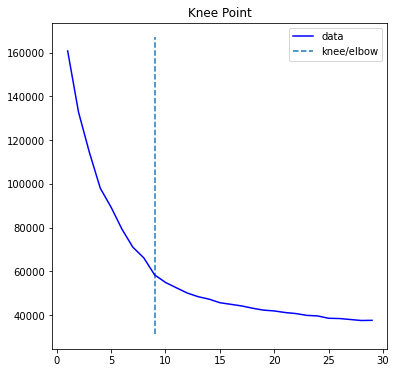

In [10]:

kl = KneeLocator(range(1, 30), dist, curve="convex",direction="decreasing")
kl.plot_knee()

In [11]:
df2.head()

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,1,1,1,0,0,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,1,1
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1024 entries, D_0 to D_1023
dtypes: int64(1024)
memory usage: 7.6 MB


### Kmeans clustering and TSNE Dimension Reduction

In [13]:
kmeans = KMeans(n_clusters=9).fit(df2)

tsne = TSNE(2)
reduced = tsne.fit_transform(df2)

No handles with labels found to put in legend.


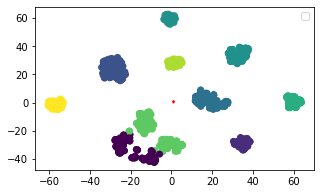

In [28]:

kmeans_scatter = plt.scatter(x=reduced.T[0], y=reduced.T[1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=1, alpha=0.5)
plt.legend()
plt.show()

In [15]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=5) 
nbrs=neighb.fit(df2) 
distances,indices=nbrs.kneighbors(df2)

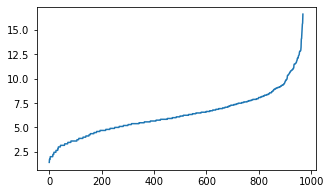

In [16]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 4] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show()

In [17]:

clustering = DBSCAN(eps = 12, min_samples = 4).fit(df2) # fitting the model
labels = clustering.labels_

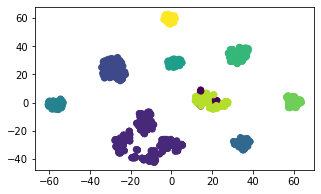

In [18]:
plt.scatter(x=reduced.T[0], y=reduced.T[1], c=labels, cmap='viridis')
plt.show()

### DBSCAN using Cosine distance metric

In [19]:
cos_sim = cosine_similarity(df2)

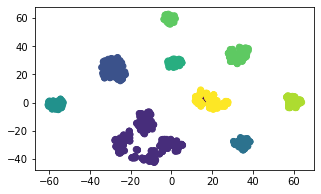

In [20]:
model_DB = DBSCAN(eps = 0.0006, min_samples =3, metric = 'cosine').fit(cos_sim)
labels = model_DB.labels_
plt.scatter(x=reduced.T[0], y=reduced.T[1], c=labels, cmap='viridis')
plt.show()

### DBSAN using Jaccard distance metric

/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


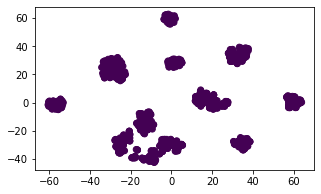

In [21]:
model_DB = DBSCAN(eps = 10**-41, min_samples =1, metric = 'jaccard').fit(cos_sim)
labels = model_DB.labels_
plt.scatter(x=reduced.T[0], y=reduced.T[1], c=labels, cmap='viridis')
plt.show()

### Clustering Comparisons

Kmeans, DBScan clustering algorithms were ran on the provided data set using various distance metrics to identify clusters. In order to effeciently run Kmeans the best value for k had to be calculated. The kmeans elbow method and kneelocator algorithms were used to identify best number of cluster for this specific dataset, which was found to be 9 approximately. Once the dataset was fitted using kmeans the next step was to reduce the dimensionality of the dateset into 2 dimensions to allow for proper visualization of the the clustering effect. Following Kmeans clustering, DBSCAN which is another clustering algorithm was used. Before using DBSCAN the best epsilon value had to first be calculated. The epsilon value represents the distance metric used to find nearest neigbours and classify clusters in the dataset. 

It can be seen that each of the cluster detection algorithms (KMeans, DBSCAN, DBSCAN using cosine distance, DBSCAN using Jaccard) return graphs showing clusters in the exact same position. The difference appears when analyzing what each algorithm classifies as a cluster based on coloring. DBSCAN using cosine distance metric more accurately displays clusters based on clustering, since a few of the clusters are not actually seperate groups as suggested by KMeans and DBSCAN using Jaccard distance metric. Although DBSCAN using Jaccard was ran with a really small value of epsilon, clusters were not properly classified as seen by presentation of clusters with single color. As such DBSCAN with using Jaccard performed the worst in comparison with KMeans and DBSCAN using cosine distance metric.